IMPORTAZIONE LIBRERIE

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

CAMBIO PATH PER ANALISI RISPETTO AL LOG DI VOLO CONSIDERATO

In [2]:
path_file = os.path.abspath(os.getcwd())
print(path_file)
os.chdir(path_file)

d:\GitHub\ProgettoManutenzionePreventiva\M6\FAULT_M6_10


VOLO m6 FAULT 5%

In [3]:
rcou_m6_fault10 = pd.read_csv("RCOU.csv")
rcou_m6_fault10 = rcou_m6_fault10.drop(['LineNo','C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8'], axis=1)

rcou_m6_fault10 = rcou_m6_fault10[((rcou_m6_fault10['C9'] >= 1400) & (rcou_m6_fault10['C10'] >= 1400) & (rcou_m6_fault10['C11'] >= 1400) & (rcou_m6_fault10['C12'] >= 1400) & (rcou_m6_fault10['C13'] >= 1400) & (rcou_m6_fault10['C14']>= 1400))]

pd.set_option('display.max_rows',700)
display(rcou_m6_fault10)

,TimeUS,C9,C10,C11,C12,C13,C14
2930,95796452,1411,1447,1454,1403,1431,1428
2933,95827847,1416,1477,1448,1447,1411,1481
2939,95891787,1447,1518,1523,1441,1484,1483
2940,95908836,1558,1418,1404,1570,1474,1510
2941,95919028,1521,1474,1431,1559,1451,1542
...,...,...,...,...,...,...,...
11352,188486214,1587,1456,1626,1405,1406,1625
11358,188550939,1628,1431,1614,1449,1411,1642
11359,188563109,1650,1401,1638,1420,1468,1601
11360,188573480,1643,1414,1604,1465,1409,1645


In [4]:
xkf1_m6_fault10 = pd.read_csv("XKF1_0.csv")
xkf1_m6_fault10 = xkf1_m6_fault10.drop(['LineNo','C','VN','VE','VD','dPD','PN','PE','PD','GX','GY','GZ','OH'], axis=1)
xkf1_m6_fault10 = xkf1_m6_fault10[((xkf1_m6_fault10['TimeUS'] >= 95796452) & (xkf1_m6_fault10['TimeUS'] <= 188583915))]
print(xkf1_m6_fault10)

          TimeUS  Roll  Pitch    Yaw
2932    95804499  0.50   0.78  22.93
2933    95815177  0.60   0.83  22.94
2934    95825583  0.47   0.89  22.92
2935    95835923  0.27   0.93  22.93
2936    95846010  0.20   0.94  22.93
...          ...   ...    ...    ...
11360  188537927 -0.02   0.25   6.60
11361  188548848 -0.05   0.25   6.72
11362  188560224 -0.05   0.21   6.82
11363  188571235 -0.09   0.31   6.90
11364  188581399 -0.01   0.26   7.00

[8433 rows x 4 columns]


In [5]:
att_m6_fault10 = pd.read_csv("ATT.csv")
att_m6_fault10 = att_m6_fault10.drop(['LineNo','ErrRP', 'ErrYaw', 'AEKF'], axis=1)
att_m6_fault10 = att_m6_fault10[((att_m6_fault10['TimeUS'] >= 95796452) & (att_m6_fault10['TimeUS'] <= 188583915))]
print(att_m6_fault10)

          TimeUS  DesRoll  Roll  DesPitch  Pitch  DesYaw    Yaw
2933    95806244    -0.12  0.50     -0.27   0.78   22.79  22.93
2934    95816755    -0.13  0.60     -0.29   0.83   22.79  22.94
2935    95826942    -0.14  0.47     -0.32   0.89   22.79  22.92
2936    95836973    -0.15  0.27     -0.35   0.93   22.79  22.93
2937    95847917    -0.15  0.20     -0.36   0.94   22.79  22.93
...          ...      ...   ...       ...    ...     ...    ...
11362  188539931     1.35 -0.02     -1.08   0.25    3.40   6.60
11363  188550219     1.43 -0.05     -1.14   0.25    3.40   6.72
11364  188562311     1.49 -0.05     -1.17   0.21    3.40   6.82
11365  188572600     1.55 -0.09     -1.22   0.31    3.40   6.90
11366  188583331     1.60 -0.01     -1.26   0.26    3.39   7.00

[8434 rows x 7 columns]


In [6]:
att_m6_fault10 = pd.merge_asof(att_m6_fault10,xkf1_m6_fault10, on="TimeUS", by=["Roll","Pitch","Yaw"], tolerance=100000)
print(att_m6_fault10)

         TimeUS  DesRoll  Roll  DesPitch  Pitch  DesYaw    Yaw
0      95806244    -0.12  0.50     -0.27   0.78   22.79  22.93
1      95816755    -0.13  0.60     -0.29   0.83   22.79  22.94
2      95826942    -0.14  0.47     -0.32   0.89   22.79  22.92
3      95836973    -0.15  0.27     -0.35   0.93   22.79  22.93
4      95847917    -0.15  0.20     -0.36   0.94   22.79  22.93
...         ...      ...   ...       ...    ...     ...    ...
8429  188539931     1.35 -0.02     -1.08   0.25    3.40   6.60
8430  188550219     1.43 -0.05     -1.14   0.25    3.40   6.72
8431  188562311     1.49 -0.05     -1.17   0.21    3.40   6.82
8432  188572600     1.55 -0.09     -1.22   0.31    3.40   6.90
8433  188583331     1.60 -0.01     -1.26   0.26    3.39   7.00

[8434 rows x 7 columns]


In [7]:
esc_5_m6_fault10 = pd.read_csv("ESC_5.csv")
esc_5_m6_fault10 = esc_5_m6_fault10.drop(['LineNo','Instance', 'RawRPM', 'Volt', 'Temp', 'CTot', 'MotTemp', 'Err'], axis=1)
esc_5_m6_fault10 = esc_5_m6_fault10[((esc_5_m6_fault10['TimeUS'] >= 95796452) & (esc_5_m6_fault10['TimeUS'] <= 188583915))]
print(esc_5_m6_fault10)

         TimeUS   RPM  Curr
266    95839764  4112  3.05
267    95952598  4856  3.41
268    96057958  5301  3.75
269    96167925  5763  3.42
270    96273370  6072  2.91
...         ...   ...   ...
1031  188032253  5828  3.29
1032  188244544  5978  3.35
1033  188345984  6129  3.49
1034  188455137  6182  3.49
1035  188567818  6061  4.30

[770 rows x 3 columns]


In [8]:
imu_2_m6_fault10 = pd.read_csv("IMU_2.csv")
imu_2_m6_fault10 = imu_2_m6_fault10.drop(['LineNo','I', 'EG', 'EA', 'T', 'GH', 'AH', 'GHz', 'AHz'], axis=1)
imu_2_m6_fault10 = imu_2_m6_fault10[((imu_2_m6_fault10['TimeUS'] >= 95796452) & (imu_2_m6_fault10['TimeUS'] <= 188583915))]
print(imu_2_m6_fault10)

          TimeUS      GyrX      GyrY      GyrZ      AccX      AccY       AccZ
11616   95798231 -0.278000  0.163968  0.010684 -0.218995 -0.005866 -10.240240
11617   95800726 -0.015033  0.139238  0.012282 -0.276373 -0.060262  -9.743722
11618   95803141  0.332010 -0.065725 -0.002947 -0.363461 -0.115589  -9.337461
11619   95806012  0.252390 -0.113363 -0.008998 -0.409520 -0.081646  -9.488367
11620   95808940 -0.157742  0.054617  0.001292 -0.429814 -0.001267  -9.860767
...          ...       ...       ...       ...       ...       ...        ...
43671  188572318 -0.064724  0.100988  0.153545 -0.023835  0.716591  -9.537595
43672  188575463  0.073389 -0.003022  0.163618  0.036336  0.746819  -9.312242
43673  188577447  0.082682 -0.086694  0.165276 -0.072556  0.672949  -9.599352
43674  188579801  0.011114  0.025145  0.161176 -0.145562  0.670149  -9.850594
43675  188583025  0.049723  0.022011  0.158054 -0.040600  0.651564  -9.802258

[32060 rows x 7 columns]


In [9]:
m6_fault10 = pd.merge_asof(att_m6_fault10, imu_2_m6_fault10, on="TimeUS",  tolerance= 100000)
print(m6_fault10)

         TimeUS  DesRoll  Roll  DesPitch  Pitch  DesYaw    Yaw      GyrX  \
0      95806244    -0.12  0.50     -0.27   0.78   22.79  22.93  0.252390   
1      95816755    -0.13  0.60     -0.29   0.83   22.79  22.94  0.277934   
2      95826942    -0.14  0.47     -0.32   0.89   22.79  22.92 -0.143479   
3      95836973    -0.15  0.27     -0.35   0.93   22.79  22.93 -0.395523   
4      95847917    -0.15  0.20     -0.36   0.94   22.79  22.93 -0.298650   
...         ...      ...   ...       ...    ...     ...    ...       ...   
8429  188539931     1.35 -0.02     -1.08   0.25    3.40   6.60  0.002865   
8430  188550219     1.43 -0.05     -1.14   0.25    3.40   6.72  0.028725   
8431  188562311     1.49 -0.05     -1.17   0.21    3.40   6.82 -0.003650   
8432  188572600     1.55 -0.09     -1.22   0.31    3.40   6.90 -0.064724   
8433  188583331     1.60 -0.01     -1.26   0.26    3.39   7.00  0.049723   

          GyrY      GyrZ      AccX      AccY      AccZ  
0    -0.113363 -0.008998 -0.40

In [10]:
m6_fault10 = pd.merge_asof(esc_5_m6_fault10, m6_fault10, on="TimeUS",  tolerance= 100000)
print(m6_fault10)

        TimeUS   RPM  Curr  DesRoll  Roll  DesPitch  Pitch  DesYaw    Yaw  \
0     95839764  4112  3.05    -0.15  0.27     -0.35   0.93   22.79  22.93   
1     95952598  4856  3.41    -0.21  0.58     -0.38   1.09   22.79  22.98   
2     96057958  5301  3.75    -0.40  0.91     -0.52   1.05   22.79  23.27   
3     96167925  5763  3.42    -0.85  1.33     -0.83   0.38   22.79  24.01   
4     96273370  6072  2.91    -1.18  0.77     -0.97  -0.90   22.79  24.97   
..         ...   ...   ...      ...   ...       ...    ...     ...    ...   
765  188032253  5828  3.29    -0.77 -2.10     -0.53  -0.47    3.41   4.32   
766  188244544  5978  3.35    -0.25 -2.10     -0.55   0.29    3.41   4.90   
767  188345984  6129  3.49     0.55 -1.38     -0.60   0.68    3.41   5.31   
768  188455137  6182  3.49     0.92 -0.24     -0.79   0.37    3.40   5.97   
769  188567818  6061  4.30     1.49 -0.05     -1.17   0.21    3.40   6.82   

         GyrX      GyrY      GyrZ      AccX      AccY       AccZ  
0   -0.3

In [11]:
m6_fault10["TimeUS"] = m6_fault10["TimeUS"] - m6_fault10.iloc[0]["TimeUS"]
m6_fault10["TimeUS"] = m6_fault10["TimeUS"].astype(int)
m6_fault10["Guasto"] = 2
print(m6_fault10)

       TimeUS   RPM  Curr  DesRoll  Roll  DesPitch  Pitch  DesYaw    Yaw  \
0           0  4112  3.05    -0.15  0.27     -0.35   0.93   22.79  22.93   
1      112834  4856  3.41    -0.21  0.58     -0.38   1.09   22.79  22.98   
2      218194  5301  3.75    -0.40  0.91     -0.52   1.05   22.79  23.27   
3      328161  5763  3.42    -0.85  1.33     -0.83   0.38   22.79  24.01   
4      433606  6072  2.91    -1.18  0.77     -0.97  -0.90   22.79  24.97   
..        ...   ...   ...      ...   ...       ...    ...     ...    ...   
765  92192489  5828  3.29    -0.77 -2.10     -0.53  -0.47    3.41   4.32   
766  92404780  5978  3.35    -0.25 -2.10     -0.55   0.29    3.41   4.90   
767  92506220  6129  3.49     0.55 -1.38     -0.60   0.68    3.41   5.31   
768  92615373  6182  3.49     0.92 -0.24     -0.79   0.37    3.40   5.97   
769  92728054  6061  4.30     1.49 -0.05     -1.17   0.21    3.40   6.82   

         GyrX      GyrY      GyrZ      AccX      AccY       AccZ  Guasto  
0   -0.39552

In [12]:
path_file = path_file.replace(r"M6\FAULT_M6_10", "")
os.chdir(path_file)
m6_fault10.to_csv('m6_fault10.csv', index=False)
print(path_file)

d:\GitHub\ProgettoManutenzionePreventiva\


## Analisi nel tempo e in frequenza

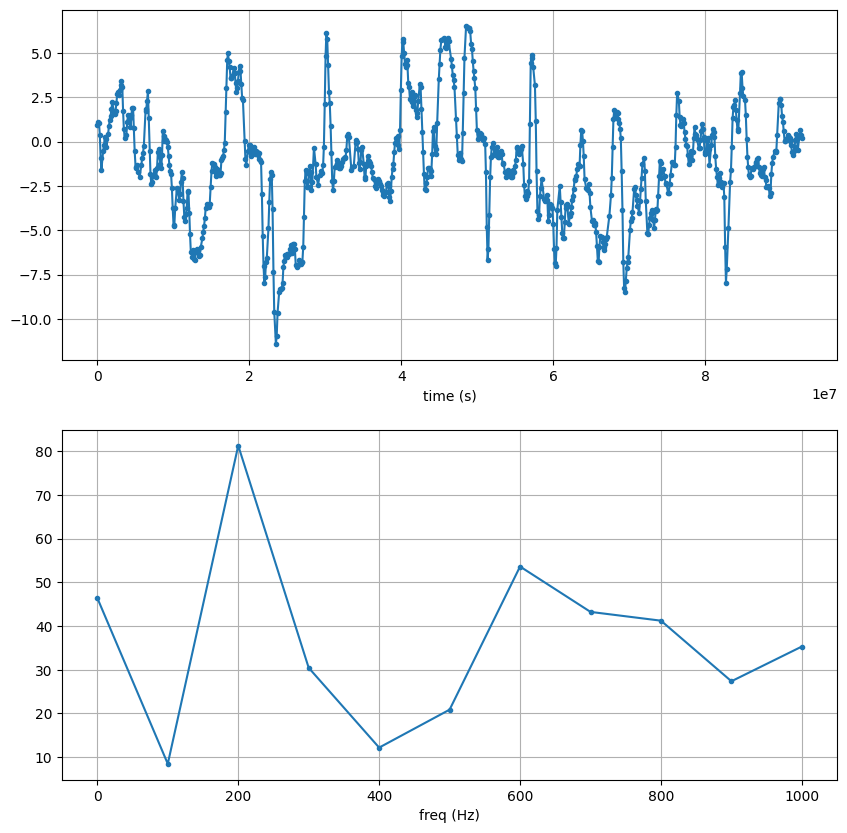

In [13]:
t = m6_fault10["TimeUS"]
y = m6_fault10["Pitch"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

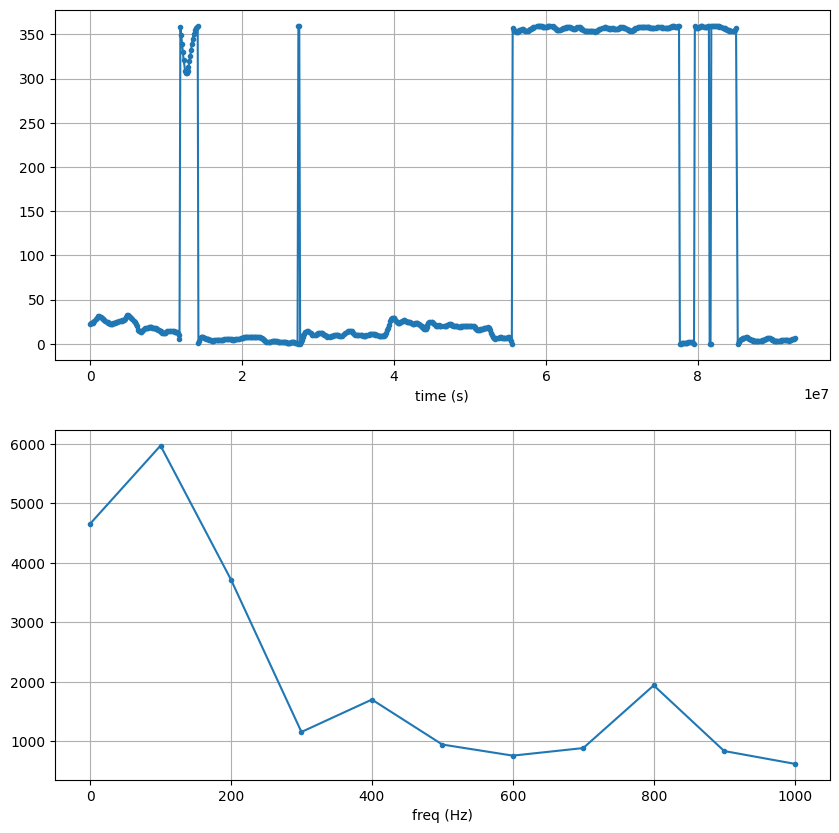

In [14]:
t = m6_fault10["TimeUS"]
y = m6_fault10["Yaw"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

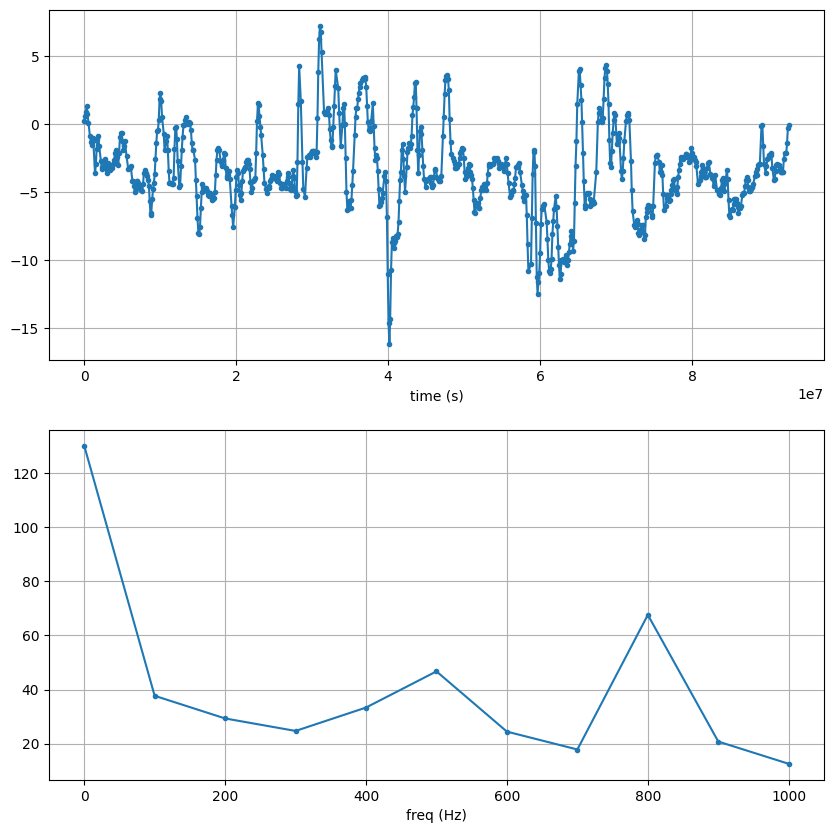

In [15]:
t = m6_fault10["TimeUS"]
y = m6_fault10["Roll"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

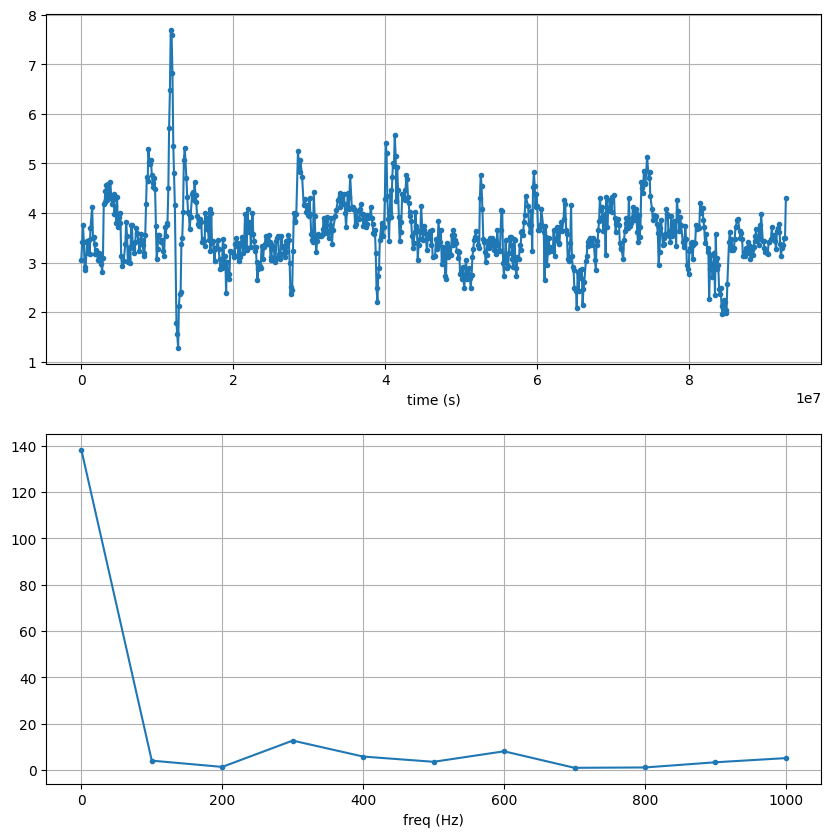

In [16]:
t = m6_fault10["TimeUS"]
y = m6_fault10["Curr"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

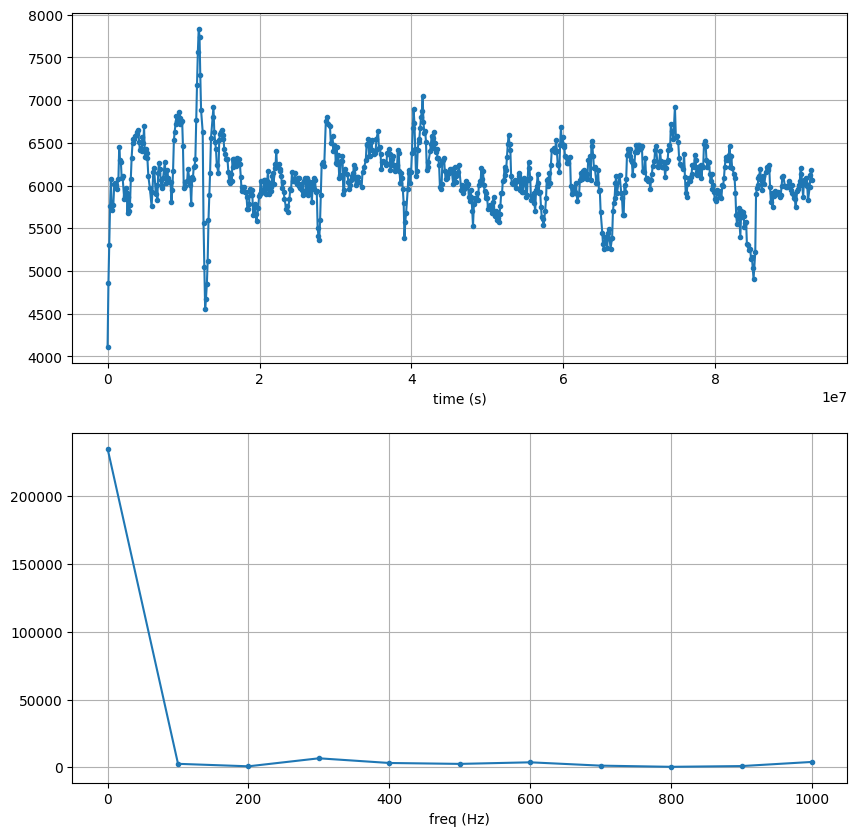

In [17]:
t = m6_fault10["TimeUS"]
y = m6_fault10["RPM"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

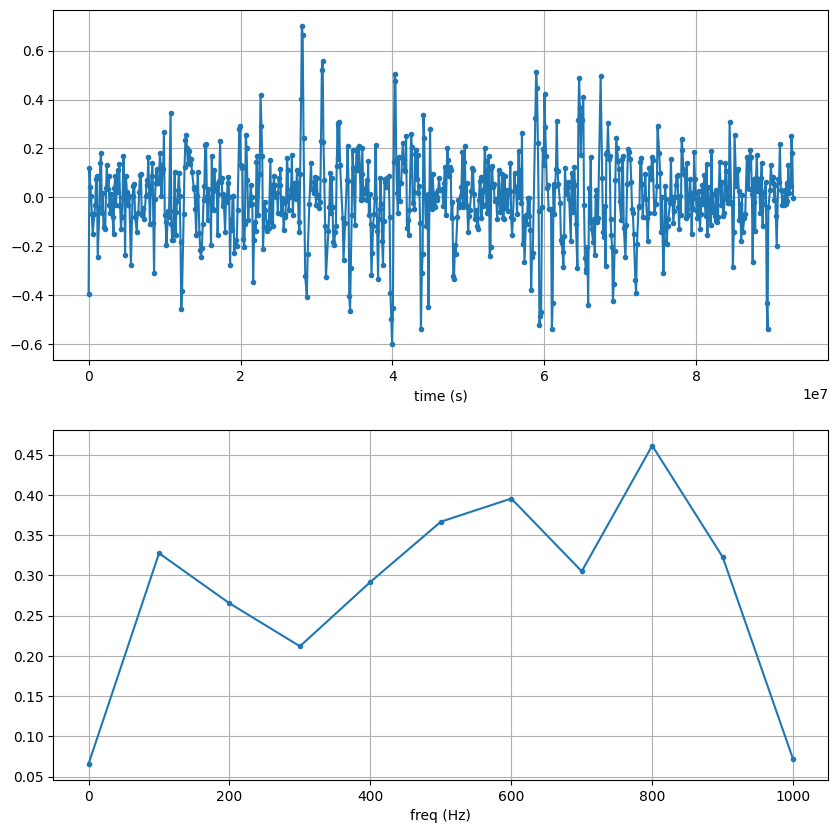

In [18]:
t = m6_fault10["TimeUS"]
y = m6_fault10["GyrX"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

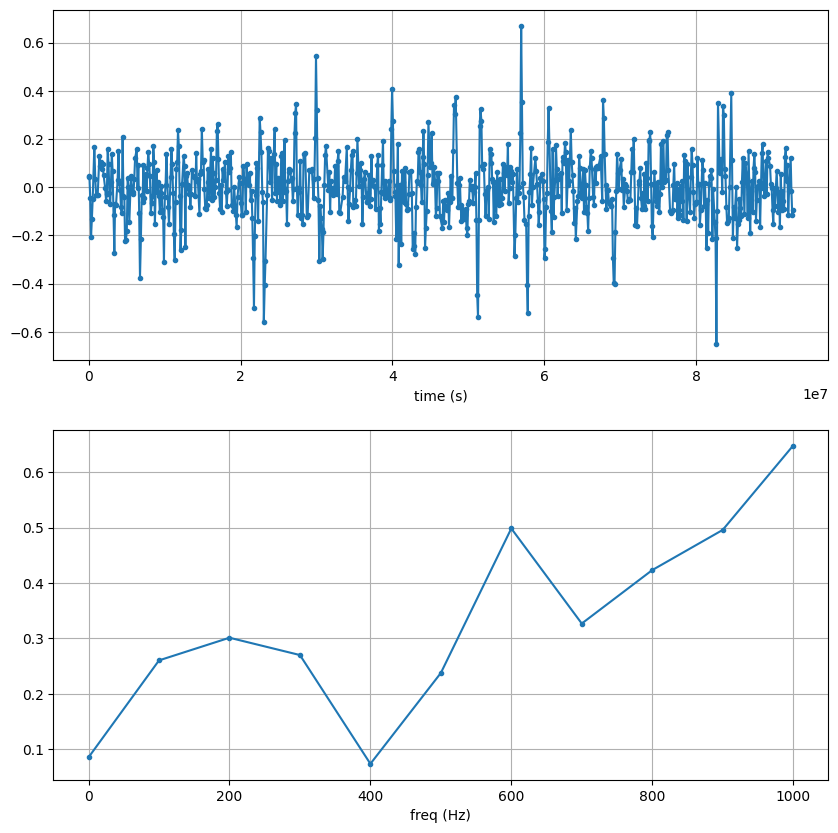

In [19]:
t = m6_fault10["TimeUS"]
y = m6_fault10["GyrY"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

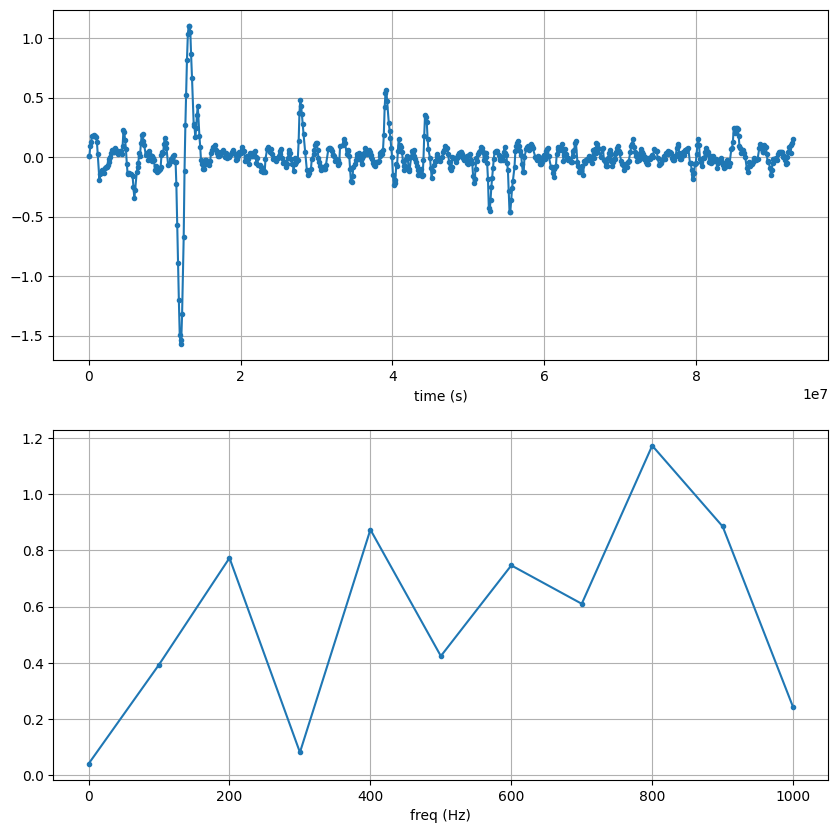

In [20]:
t = m6_fault10["TimeUS"]
y = m6_fault10["GyrZ"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

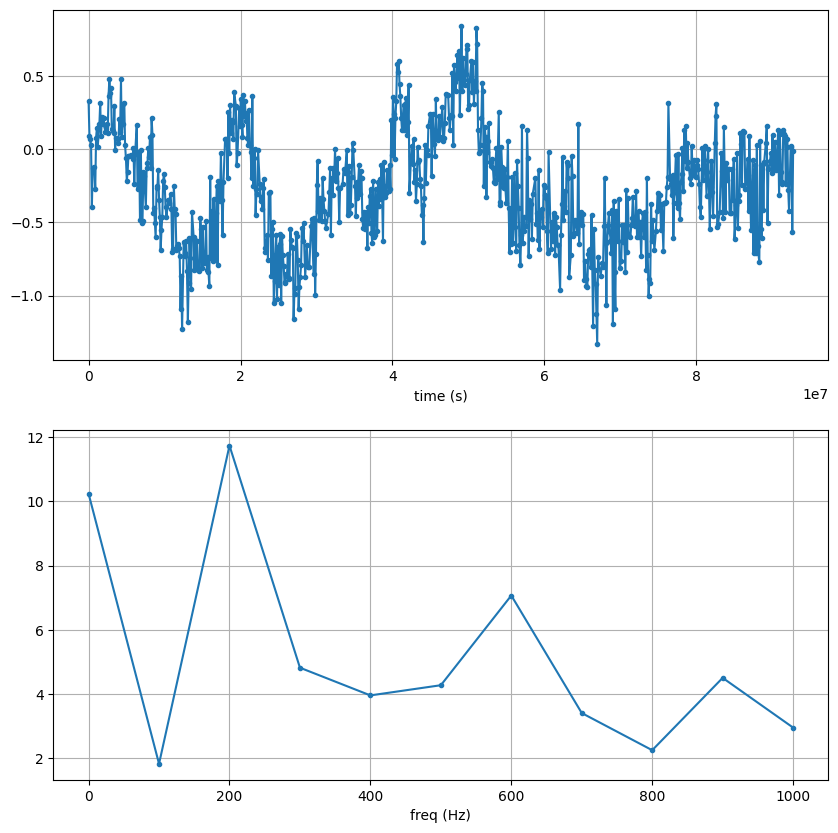

In [21]:
t = m6_fault10["TimeUS"]
y = m6_fault10["AccX"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

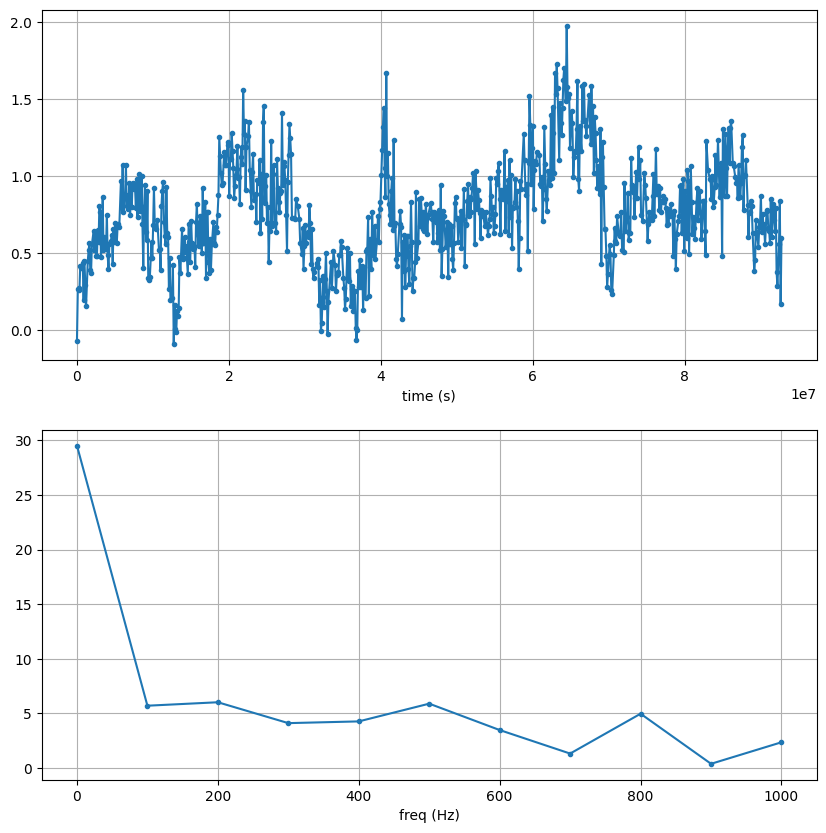

In [22]:
t = m6_fault10["TimeUS"]
y = m6_fault10["AccY"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

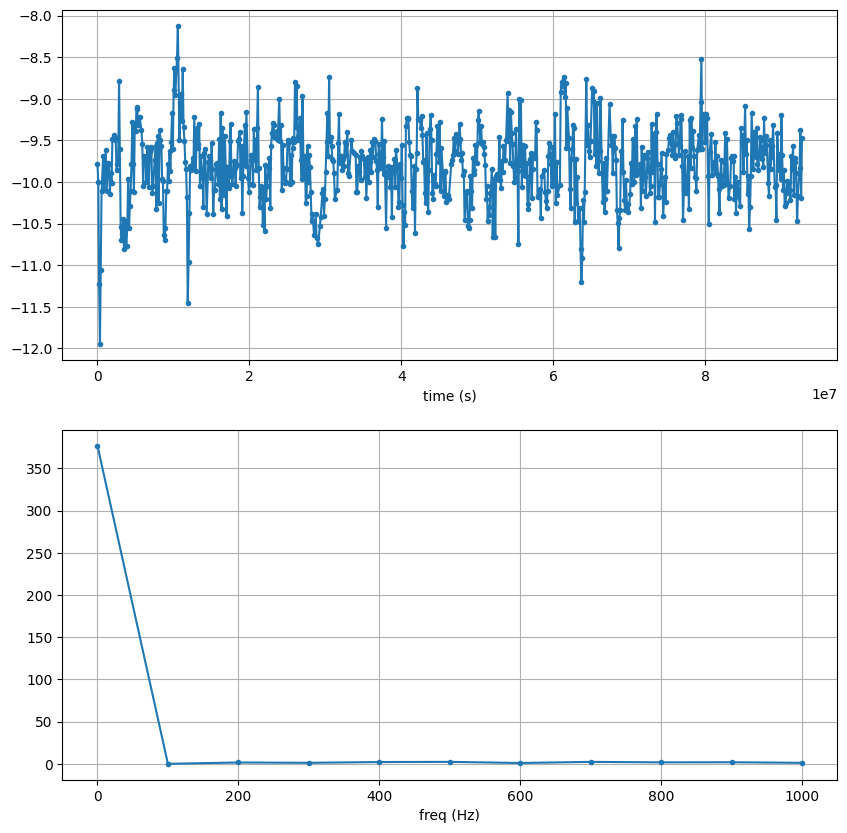

In [23]:
t = m6_fault10["TimeUS"]
y = m6_fault10["AccZ"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()